# Loan Prediction - 01 - Exploratory Data Analysis

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as sp
plt.style.use('seaborn')


### Importing and pre-visualization

In [2]:
df_import = pd.read_csv('dataset/train_loan.csv')
display(df_import.head(10))
print(df_import.shape)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y
6,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,Y
7,LP001014,Male,Yes,3+,Graduate,No,3036,2504.0,158.0,360.0,0.0,Semiurban,N
8,LP001018,Male,Yes,2,Graduate,No,4006,1526.0,168.0,360.0,1.0,Urban,Y
9,LP001020,Male,Yes,1,Graduate,No,12841,10968.0,349.0,360.0,1.0,Semiurban,N


(614, 13)


In [3]:
df_import.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

### Checking valid values

In [4]:
df_import.count()

Loan_ID              614
Gender               601
Married              611
Dependents           599
Education            614
Self_Employed        582
ApplicantIncome      614
CoapplicantIncome    614
LoanAmount           592
Loan_Amount_Term     600
Credit_History       564
Property_Area        614
Loan_Status          614
dtype: int64

Each register of the dataset is a client profile for a loan transaction. 

That being said, we will take a more conservative approach and remove all registers with invalid values for now.

In [5]:
df_import_no_nan = df_import.copy().dropna()
df_import_no_nan.count()

Loan_ID              480
Gender               480
Married              480
Dependents           480
Education            480
Self_Employed        480
ApplicantIncome      480
CoapplicantIncome    480
LoanAmount           480
Loan_Amount_Term     480
Credit_History       480
Property_Area        480
Loan_Status          480
dtype: int64

### Visualizing categorical data distribution

In [6]:
def show_column_options(df):
    print('Column Values:')
    cols = df.columns
    for col in cols:
        print(col,':',df[col].unique())

In [7]:
categorical_columns = ['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Property_Area', 'Credit_History', 'Loan_Status']
show_column_options(df_import[categorical_columns])

Column Values:
Gender : ['Male' 'Female' nan]
Married : ['No' 'Yes' nan]
Dependents : ['0' '1' '2' '3+' nan]
Education : ['Graduate' 'Not Graduate']
Self_Employed : ['No' 'Yes' nan]
Property_Area : ['Urban' 'Rural' 'Semiurban']
Credit_History : [ 1.  0. nan]
Loan_Status : ['Y' 'N']


In [8]:
def plot_variable_distribution(df,title,show_loan_approval = True,n_columns = 4,n_rows = 2):

    fig, axes = plt.subplots(n_rows,n_columns,figsize=(20, 12))
    fig.suptitle(title,fontsize = 20)
    status_colors = ['#008000','#C24641']
    
    for index,col in enumerate(df.columns):

        keys = df[col].value_counts().keys()
        row_index = int(index/n_columns)
        col_index = int(index - n_columns*row_index)

        if show_loan_approval:
            approved = df.copy()[df['Loan_Status'] == 'Y'][col]
            approved = approved.value_counts()
            not_approved = df.copy()[df['Loan_Status'] == 'N'][col]
            not_approved = not_approved.value_counts()
            ax = pd.DataFrame({'Loan Approved': approved, 'Loan not Approved': not_approved}).plot(kind='bar', stacked=True,ax = axes[row_index][col_index])
            ax.set_xticklabels(keys)
        else:
            unique_counts =  df[col].value_counts().to_list()
            axes[row_index][col_index].bar(keys,unique_counts)
        axes[row_index][col_index].set_title(col)
    
    plt.subplots_adjust(top=0.92, bottom=0.08, left=0.10, right=0.95, hspace=0.35,
                    wspace=0.35)
    plt.show()


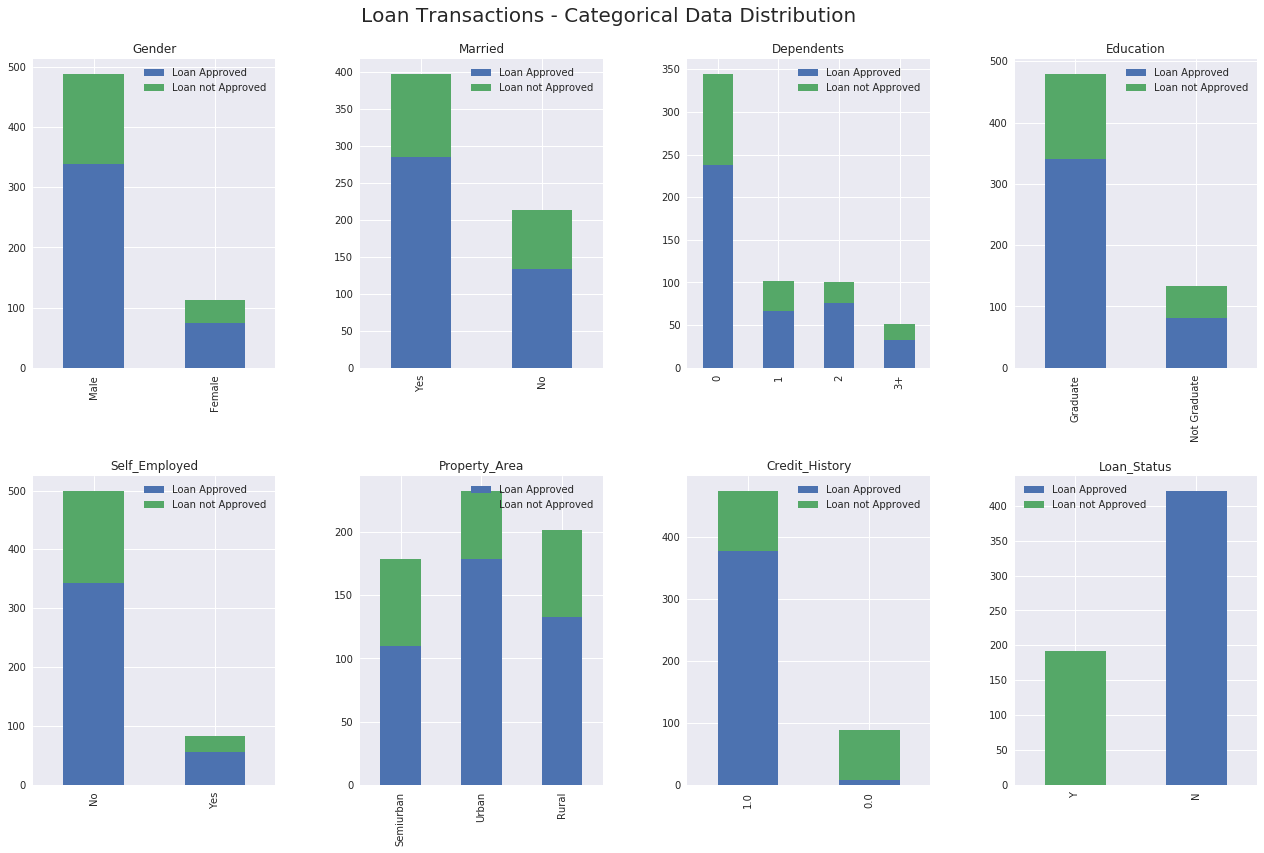

In [9]:
plot_variable_distribution(df_import[categorical_columns],'Loan Transactions - Categorical Data Distribution',show_loan_approval=True)

In most of the categorical variables, there are no great changes in proportions between loans approved and not approved. For example, the proportion of Male/Female appears to be similar in both approved and not approved loan transactions.

Data shows that the only variable that appears to shift proportions drastically is the Credit_History. Although it makes sense that clients not following the bank guidelines are more prone to not receiving a loan, this is not a mandatory condition.

### Visualizing numerical data

In [10]:
def plot_numerical_distributions(df,title,n_rows = 2,n_columns = 2):
    #TODO: Make a cumulative density plot along with this plot
    fig, axes = plt.subplots(n_rows,n_columns,figsize=(18, 12))
    fig.suptitle(title,fontsize = 20)
    
    for index,col in enumerate(df.columns):

        row_index = int(index/n_columns)
        col_index = int(index - n_columns*row_index)
        ax = sns.distplot(df[col], norm_hist=False,ax = axes[row_index][col_index],kde = False) 
        ax.set_title(col)
        label = r'$\mu={0},\ \sigma={1},\ median={2},\ mode={3}$'.format(int(df[col].mean()),int(df[col].std()),int(df[col].median()),int(df[col].mode().values[0]))
        ax.set_xlabel(label)
    plt.subplots_adjust(top=0.92, bottom=0.08, left=0.10, right=0.95, hspace=0.35,
                    wspace=0.35)
    plt.show()
    
def plot_numerical_correlation(df,title):
    scatter_matrix = sns.pairplot(df_import_no_nan[numerical_columns + ['Loan_Status']],hue='Loan_Status',height = 4);
    scatter_matrix.fig.suptitle('Correlation Between Numerical Variables',fontsize = 20);
    plt.subplots_adjust(top=0.9)

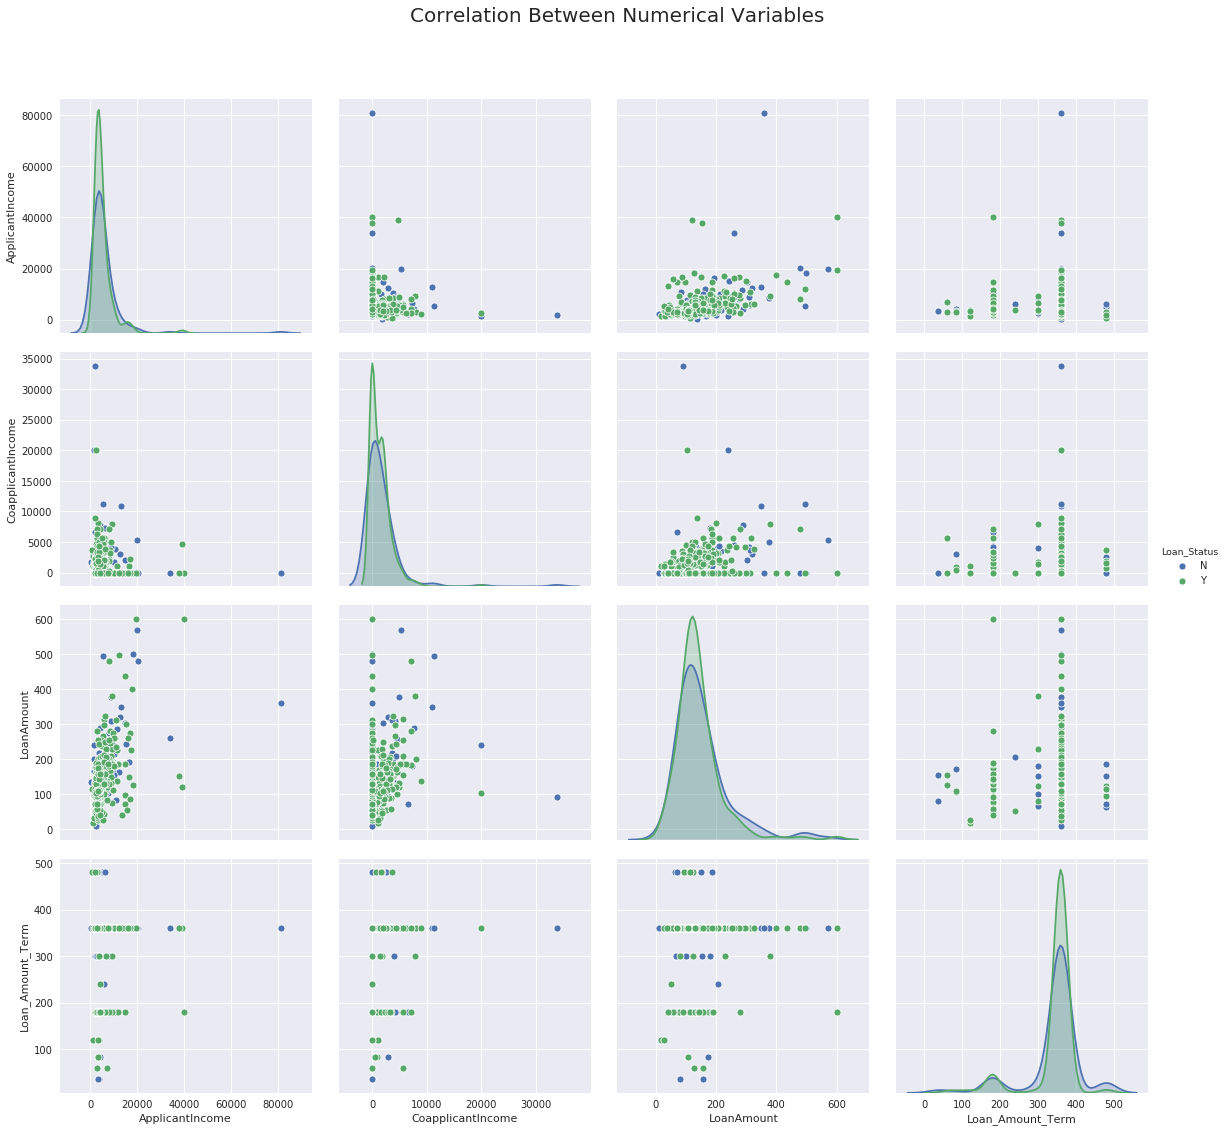

In [11]:
numerical_columns = ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term']
plot_numerical_correlation(df_import_no_nan[numerical_columns + ['Loan_Status']],'Correlation Between Numerical Variables')

There are no explicit cluster or strong correlation between the numerical variables.

Let us take a closer look at the numerical data distribution then.

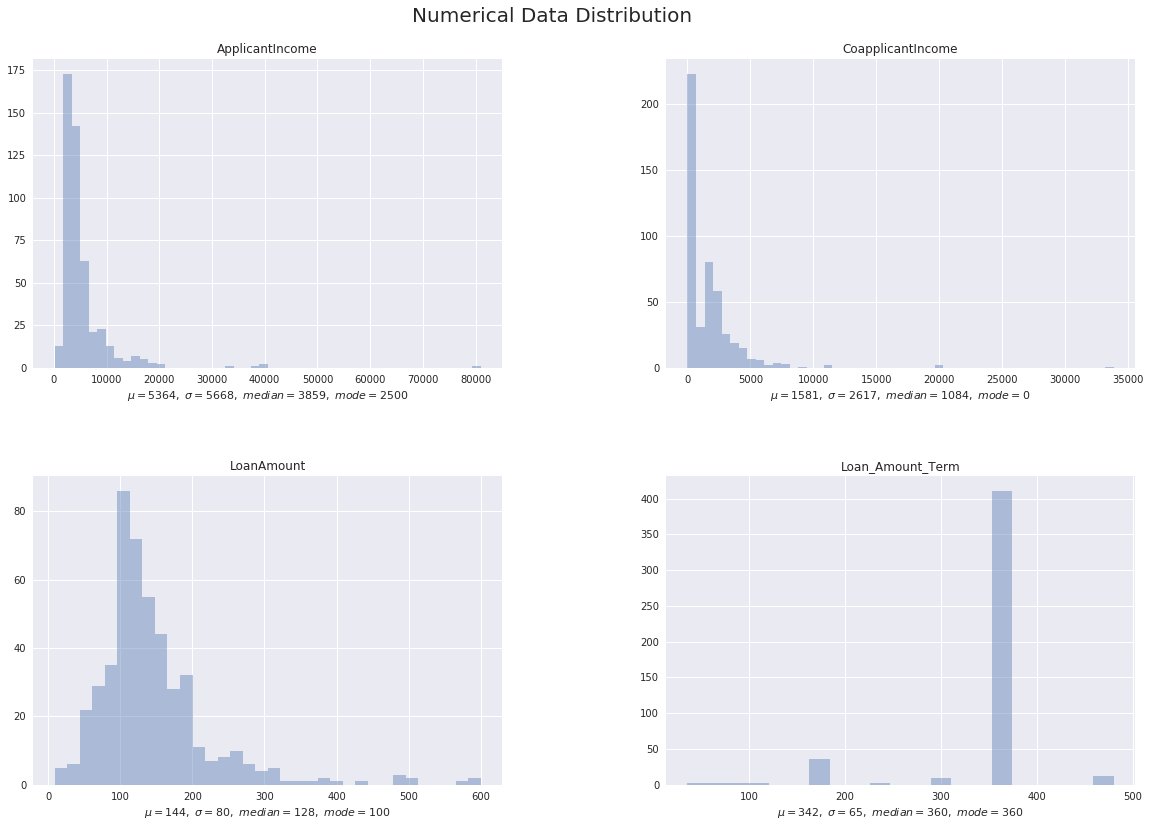

In [12]:
df_numerical = df_import_no_nan[numerical_columns].copy()
plot_numerical_distributions(df_numerical,'Numerical Data Distribution')

## Let us analyse data without values exceding 4 standard deviations

In [13]:
outlier_threshold = 4
z_score = np.abs(sp.zscore(df_numerical))
df_numerical_no_outlier = df_numerical[(z_score < outlier_threshold).all(axis=1)]
display(df_numerical_no_outlier.describe())
print(df_numerical_no_outlier.shape)

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term
count,461.000000,461.000000,461.000000,461.000000
mean,4809.188720,1411.941258,137.555315,344.407809
std,3103.729442,1717.158207,62.723129,60.022665
min,150.000000,0.000000,9.000000,84.000000
25%,2889.000000,0.000000,100.000000,360.000000
50%,3846.000000,1126.000000,127.000000,360.000000
75%,5726.000000,2232.000000,165.000000,360.000000
max,18165.000000,10968.000000,436.000000,480.000000


(461, 4)


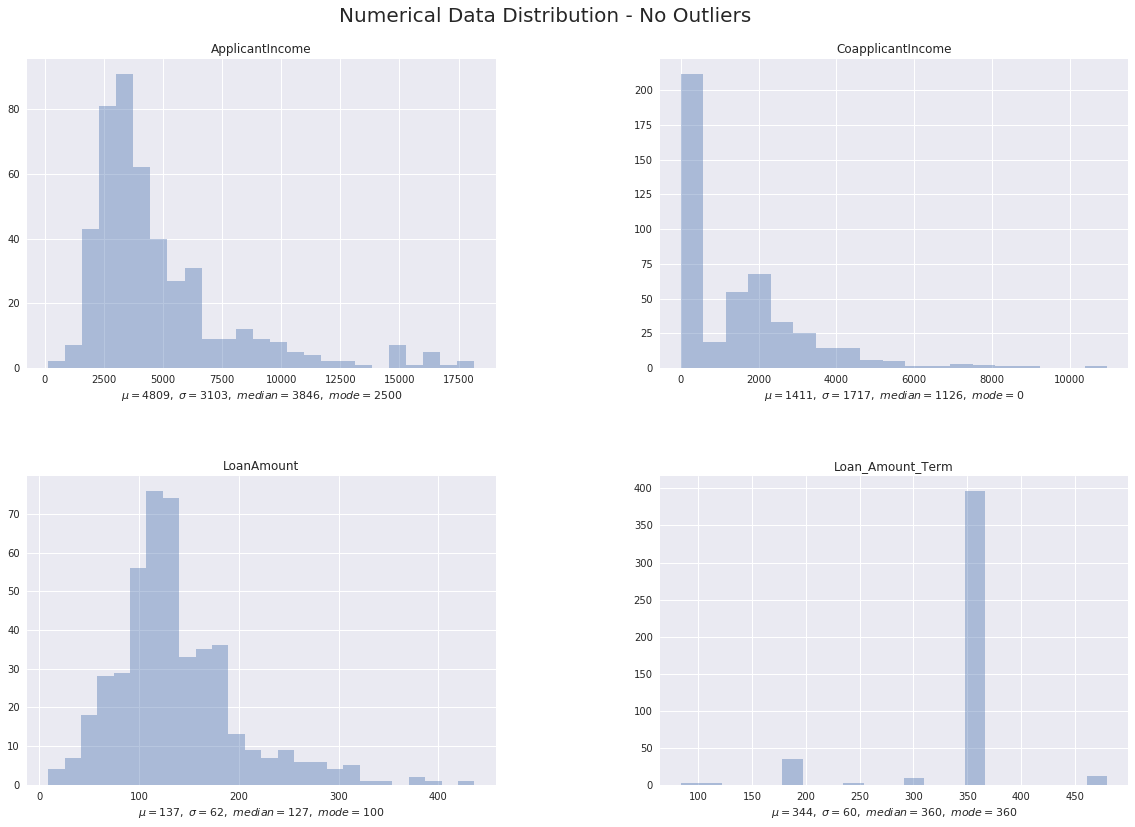

In [14]:
plot_numerical_distributions(df_numerical_no_outlier,'Numerical Data Distribution - No Outliers')

### Loan Amount Term Analysis

In [15]:
loan_amount_term_mode = df_numerical_no_outlier['Loan_Amount_Term'].mode().values[0]
loan_amount_term_mode_count = (df_numerical_no_outlier['Loan_Amount_Term'] == loan_amount_term_mode).sum()
loan_amount_term_mode_percentage = loan_amount_term_mode_count/df_numerical_no_outlier['Loan_Amount_Term'].count()

print('Mode for Loan_Amount_Term:', loan_amount_term_mode)
print('Count: ',loan_amount_term_mode_count)
print('Pergentage: ',loan_amount_term_mode_percentage)

Mode for Loan_Amount_Term: 360.0
Count:  397
Pergentage:  0.8611713665943601


### Coapplicant Income Analysis

In [17]:
coapplicant_mode = df_numerical_no_outlier['CoapplicantIncome'].mode().values[0]
coapplicant_mode_count = (df_numerical_no_outlier['CoapplicantIncome'] == coapplicant_mode).sum()
coapplicant_mode_percentage = coapplicant_mode_count/df_numerical_no_outlier['CoapplicantIncome'].count()

print('Mode for Loan_Amount_Term:', coapplicant_mode)
print('Count: ',coapplicant_mode_count)
print('Pergentage: ',coapplicant_mode_percentage)

Mode for Loan_Amount_Term: 0.0
Count:  205
Pergentage:  0.44468546637744033


## Conclusions

- Most of the clients who did not meet the bank guidelines (Credit_History) had their loan applications rejected.
- Most of the applicants income are under 5700.
- Most of the co-applicants income are below 2200 and almost half of them have 0 income.
- Most of the loan terms are 360 months.
- Most of the clients are not self-employed.
- No explict correlation or clusters between any pair of variables.